In [ ]:
#import relevant libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

#Mount google drive where I put the data
from google.colab import drive
drive.mount('/content/gdrive/') #gain acess to my google drive where I put data files

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


#Problem 1a
Create a frequency vector f with the frequency axis in Hz. This frequency vector should be the same length as Xf. Now plot the magnitude spectrum of the signal using plot(f, abs(Xf)). You should see five distinct peaks corresponding to the five sinusoids. Two of the peaks are close to each other, so you may have to zoom in to see all of them. Include this plot in your report.

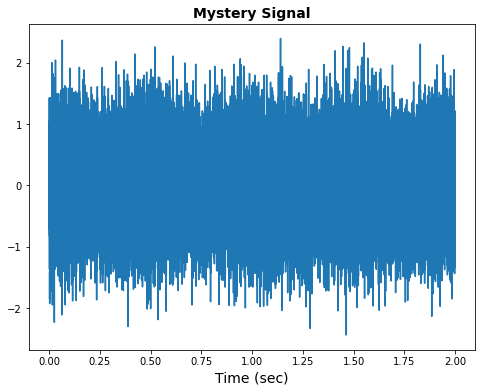

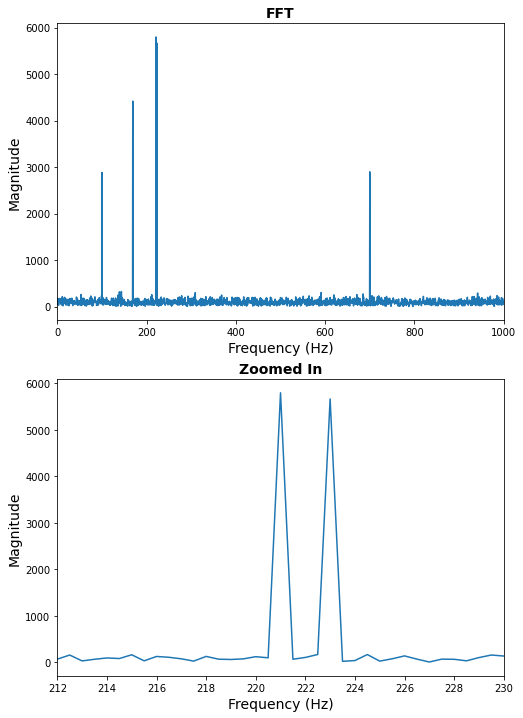

In [ ]:
#load data
pathToFile = '/content/gdrive/MyDrive/Purdue/BME511/ProblemSets/PS1/mysterysignal.mat'
mysterySig = sio.loadmat(pathToFile,squeeze_me = True)
x = mysterySig['x']
fs = 22050.0;

#Plot the signal to see what it looks like
t = np.arange(0,x.size/fs,1./fs)
plt.figure(figsize=(8,6))
plt.plot(t,x)
plt.xlabel('Time (sec)',fontsize=14)
plt.title('Mystery Signal',fontsize=14, fontweight='bold')
plt.show()

#compute fourier transform
Xf = np.fft.fft(x,axis=0)
N = Xf.size # we took an N point fft, where N is the length of the signal

f = np.fft.fftfreq(N, d=1/fs) # get frequency vector
#Just look at postivie frequencies since fft is symmetric fore real signals
Xf = Xf[f>=0]
f = f[f>=0]

#Plot FFT
fig,ax = plt.subplots(2,1,figsize=(8,12))
ax[0].plot(f,abs(Xf))
ax[0].set_xlabel('Frequency (Hz)',fontsize=14)
ax[0].set_ylabel('Magnitude',fontsize=14)
ax[0].set_xlim([0,1000])
ax[0].set_title('FFT',fontweight='bold',fontsize=14)

#Plot Zoomed in Version
ax[1].plot(f,abs(Xf))
ax[1].set_xlabel('Frequency (Hz)',fontsize=14)
ax[1].set_ylabel('Magnitude',fontsize=14)
ax[1].set_xlim([212,230])
ax[1].set_title('Zoomed In',fontweight='bold',fontsize=14)
fig.show()





#Problem 1b
Read off the frequencies of each of the five sinusoids in Hz. Zoom in as needed to see the where the peaks are. All the sinusoids should have frequencies less than 1000 Hz. Use this fact to debug any mistakes you might make in generating the frequency vector. Include the results in your report.


In [ ]:
F_5 = f[abs(Xf)>2000] #Peaks can be easily picked off by picking a reasonable threshold
print('The frequencies of the five sinusoids are: ' + str(F_5))

The frequencies of the five sinusoids are: [100. 169. 221. 223. 700.]


#Problem 1c 
Read off the approximate relative amplitudes of the first four sinusoids (lowest four frequencies) relative to amplitude of the fifth (highest frequency) sinusoid. Include the results in your report

In [ ]:
Amp_pks = abs(Xf[abs(Xf)>2000])
Amp_pks_relative = Amp_pks / Amp_pks[-1]
print('The relative amplitdues of the first four sinusoids relative to the fifth sinusoid are: ' + str(Amp_pks_relative[:-1]))

The relative amplitdues of the first four sinusoids relative to the fifth sinusoid are: [0.99501296 1.52476415 2.00114837 1.95560351]


#Problem 1d
Now let’s turn our attention to the phase spectrum. In a new figure, plot the phase spectrum of the signal using plot(f, np.angle(Xf)) (if you are using Numpy imported as np). Because most frequencies only contain noise and the sinusoids are only at five of the frequencies, the phase spectrum will look messy and not interpretable. One way to get around this to threshold
the phase spectrum based on the magnitude spectrum. That is, set the phase to zero for any frequency where the magnitude is less than 50% of the smallest sinusoid, by doing something like:

```
phi = np.angle(Xf)
phi[np.abs(Xf) < threshold] = 0
```

Plot the thresholded phase spectrum using open circles. This would work well because there are only five points you care about. From this, read off the approximate phase of each sinusoid in the mix (in radians). Include the plot, and the phase values in your report.

The phases of the five sinusoids are: [-0.06005981 -0.10514378 -0.13878013 -0.14072999 -0.42362823] radians 



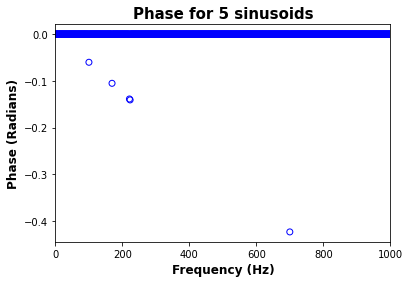

In [ ]:
#Compute threshold phase spectrum
phi = np.angle(Xf);
phi[abs(Xf)<2000] = 0

#Plot threshold phase spectrum

plt.figure()
plt.scatter(f,phi,facecolors='none',edgecolors='b')
plt.xlabel('Frequency (Hz)',fontweight='bold',fontsize=12)
plt.ylabel('Phase (Radians)',fontweight='bold',fontsize=12)
plt.xlim([0,1000])
plt.title('Phase for 5 sinusoids',fontweight='bold',fontsize=15)
fig.show()

#Get the five points we care about
phi_5sin = phi[phi<0]

print('The phases of the five sinusoids are: ' + str(phi_5sin) + ' radians \n')

#Problem 2a
How long in seconds is the signal x? Create a time vector t of the same length as x. Remember that the sampling rate is 22050 Hz.

In [ ]:
#I computed the time vector above but will do again here
t = np.arange(0,x.size/fs,1./fs)
print('The signal x is ' + str(x.size/fs) + ' seconds long.')

The signal x is 2.0 seconds long.


#Problem 2b
Use the time vector to extract just the first 200 milliseconds of the data. Let’s call this x200.

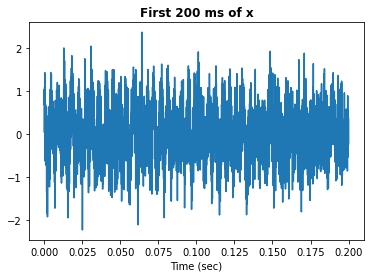

In [ ]:
t200 = t[t<.2] #time vector of first 200 milliseconds
x200 = x[t<.2] #x for the first 200 milliseconds


plt.figure()
plt.plot(t200,x200)
plt.xlabel('Time (sec)')
plt.title('First 200 ms of x',fontweight='bold')
plt.show()

#Problem 2c
Recalculate the spectrum of the signal using x200. Let’s call this Xf2. Make sure that Xf2 has the same length as Xf in Problem 1. That way you can use the same frequency vector from problem 1 to plot results. This can be achieved by providing a second argument to the fftfunction to specify the number of frequency points.

This simulates a situation where you happen to have a only short measurement when you are trying to estimate a spectrum. Plot the magnitude of Xf2 against f, zoom in the same way to see the peaks clearly, and include this plot in your report.

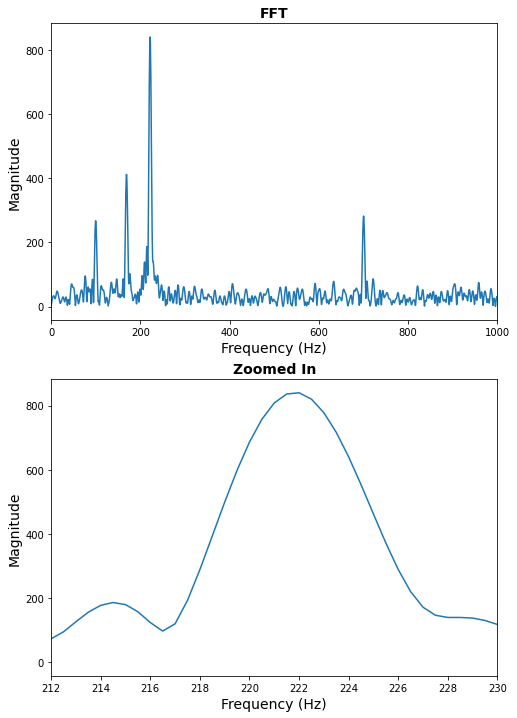

In [ ]:
Xf2 = np.fft.fft(x200,axis=0,n=x.size) #compute the fft with the same number of samples as full length of x
Xf2 = Xf2[:Xf.size] #I am only going to keep half the spectrum since it is symmetric. Xf keeps half the spectrum so I will just use its size to do that

#Plot FFT
fig,ax = plt.subplots(2,1,figsize=(8,12))
ax[0].plot(f,abs(Xf2))
ax[0].set_xlabel('Frequency (Hz)',fontsize=14)
ax[0].set_ylabel('Magnitude',fontsize=14)
ax[0].set_xlim([0,1000])
ax[0].set_title('FFT',fontweight='bold',fontsize=14)

#Plot Zoomed in Version
ax[1].plot(f,abs(Xf2))
ax[1].set_xlabel('Frequency (Hz)',fontsize=14)
ax[1].set_ylabel('Magnitude',fontsize=14)
ax[1].set_xlim([212,230])
ax[1].set_title('Zoomed In',fontweight='bold',fontsize=14)
fig.show()

#Problem 2D
How many peaks do you see now? Comment on the qualitative difference between the plot of Xf2 here, and the plot of Xf from Problem 1. Noting that the difference between the two is the length of the time signal (longer in Problem 1, and 200 ms here), comment on how the time time length of a signal may be related to the frequency resolution of your spectrum estimate.

Now only 4 peaks are clearly visible. Also the peaks are wider so energy is spread out across more frequencies. A shorter signal reduces frequency resolution. The frequency resolution is approximately $\frac{1}{Time}$, so previously we had a resolution of 0.5 Hz in problem 1, but 5 Hz in Problem 2. Two nearby peaks have been smeared together which is why it seems like there are only 4 peaks now. 

#Problem 2e
Extracting a 200 ms window of a longer signal can be thought of as multiplying the longer signal with a rectangular box that is 200 ms long (i.e., the box is a signal that has a value of 1 for the first 200 ms, and then zero for the rest of the time). Can you use this fact to explain the difference between Xf2 and Xf? Briefly comment.

Multiplication  in  the  time  domain  is  convolution  in  the  frequency domain. So we are convolving the true frequency response with a sinc function.  A shorter box corresponds to a broader main peak in the sinc function leading to more smearing in the frequency domain.

#Problem 3
You can also listen to the impulse response itself similarly (it is basically what a single loud clap may sound like in a large cathedral). Use the conv function in MATLAB or Numpy/Scipy to convolve h with x and listen to the result. Does the LTI model work? That is, does the convolution prediction
of what you should hear match what you expect from your real-life experience? Briefly comment.

In [ ]:
from IPython.display import Audio #Module to play audio

#Load data
pathToFile = '/content/gdrive/MyDrive/Purdue/BME511/ProblemSets/PS1/stalbans.mat'
Cathedral = sio.loadmat(pathToFile,squeeze_me=True)
h = Cathedral['h']
x = Cathedral['x']
fs = int(Cathedral['fs'])

#convolve h with x
sig_conv = np.convolve(h,x)

In [ ]:
Audio(data=x, rate=fs)

In [ ]:
Audio(data=h, rate=fs)

In [ ]:
Audio(data=sig_conv, rate=fs)

The LTI model does seem to work. Phsyical acoustics are LTI so it makes sense that the output of the convolution reflects what I would expect to hear.

#Problem 3a
Now, instead of convolution in time, apply the room filter by doing a multiplication in the frequency domain, with attention to the following:

Note that h and x are different length. First, pad the shorter signal with zeros so that the two become the same length.

In [ ]:
print('The length of x is ' + str(x.size) + ' and the length of h is ' + 
      str(h.size) +' so I will pad X with ' + str(h.size-x.size) + ' zeros')

x = np.concatenate((x, np.zeros([h.size-x.size])),axis=0) #Pad x with zeros


The length of x is 86927 and the length of h is 264600 so I will pad X with 177673 zeros


#Problem 3b
Use fft to calculate the Fourier representation of both the speech and the impulse response. Then multiply them to apply the cathedral filter to the speech.

In [ ]:
Xf = np.fft.fft(x) #Fourier representation of X
Hf = np.fft.fft(h) #Fourier representation of H
sig_f = Xf * Hf #Multiply signals in fourier domain

#Problem 3c
Use ifft on the result of the multiplication to convert back to time domain. You might expect that the result here should match the result of the conv in time that you did earlier. Does it? Briefly comment. Also include the code used for this problem within your PDF report (not as a separate file).



In [ ]:
sig_t = np.fft.ifft(sig_f) #ifft

In [ ]:
Audio(sig_t,rate=fs) #Listen to it to see if it sounds the same

/usr/local/lib/python3.7/dist-packages/IPython/lib/display.py:123: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0, 'Time (s)')

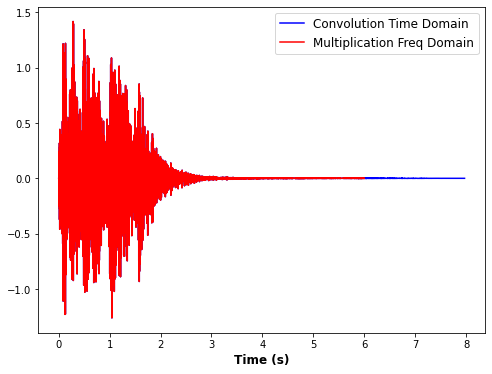

In [ ]:
#Lets plot the two on top of each other to see how similar they are
t1 = np.arange(0,sig_conv.size/fs,1/fs)
t2 = np.arange(0,sig_t.size/fs,1/fs)
plt.figure(figsize=(8,6))
plt.plot(t1,sig_conv,c='b',label ='Convolution Time Domain')
plt.plot(t2,sig_t,c='r',label ='Multiplication Freq Domain')
plt.legend(fontsize=12)
plt.xlabel('Time (s)',fontweight='bold',fontsize=12)

The signals match quite closely! They sound the same and looking at the time domain plots, it is a very close match. The signals are the same because convolution in the time domain is multiplication in the frequency domain. 

#Problem 4
Below are plots of five signals represented in the time domain (left), and the magnitude of their Fourier transforms in jumbled order (right). Absolute units on the time and frequency axes are deliberately omitted. However, the time axis and frequency axis are common across all 5 signals so that any two signals can still be compared in relative terms. Can you match which time-domain signals (A – E) go with which Fourier transforms (P – T)? Describe your reasoning for your solution briefly.
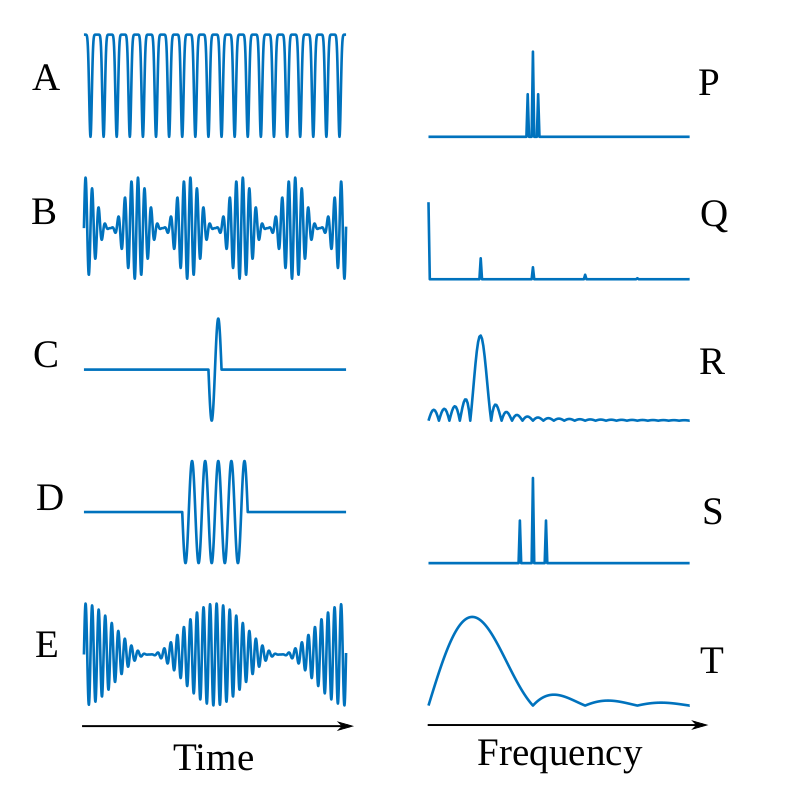

##A = Q
This looks like a rectified sine wave with clipping. This is a periodic, but non-sinusiodal signal, and will contain not only the fundamental frequency but also the harmonics. So I am looking for a spectrum with equally spaced peaks decreasing in magnitdue. Q matches that description.
##B = S, E = P
B & E are sinusoidally amplitdue modulated (SAM) tones, i.e., a higher-frequency sine tone is multiplied by lower-frequency sine tone of the form sin(2$\pi f_1$t) * (1 + sin(2$\pi f_2$t)). Thus, it will have the spectrum corresponding to the convolution of two tones (plus a DC term) in the frequency domain which means it should have 3 peaks in the spectrum (6 in the full spectrum). I know B & E should match with S & P now. 
To determine which goes with which, I just need to think about the convolution. The distance between the two side peaks and the central peak will be the frequency of the sinusoidal modulation. B has the faster modulation, so the side peaks should be further from the central peak in its spectrum compared to E which is clearly S and then E goes with P. Thinking about the modulation as a beating between two frequencies should also let you arrive at the same conclusion.

## C = T, D = R
C & D both look like tones of a similar frequency but D has more cycles. Considering time frequency tradeoff, the two should have similar spectrums but D will have better resolution in the frequency domain since it has more cycles. I am looking for a spectrum with a sharper peak for D and a broader peak for C. From that it is clear that C goes with T and D with R.

#Problem 5a,b
**a)** Simulate an experiment where you do N measurements. Assume that the measurements are normally distributed. Because the true depth is 47 mm, each measurement will be a random number whose distribution is Gaussian with a mean of 47 mm and a variance of 100 mm (standard deviation of 10 mm). Write a small script to generate N=4 such measurements. MATLAB or Scipy’s randn function will be useful here.
**b)** Estimate the depth by calculating the mean from your measurements. It will of course not exactly be 47 mm.

In [ ]:
from numpy import random

measures = 10*random.randn(4) + 47  #part a
estimate = measures.mean() #part b
print('An estimate of the mean after 4 measurements is ' + str(estimate))


An estimate of the mean after 4 measurements is 44.17100890271956


#Problem 5C
Now imagine that you repeat the whole experiment on 100 different days, with making 4 measurements on each day, and calculating an average on each day to estimate the depth of tumor. Simulate this scenario by repeating the whole experiment code 100 times. Now you should have 100 average estimates of tumor depth, one for each day. What is the variance of the estimated tumor depth across days? Is this a smaller number than the variance of a single measurement (which was 100 mm)? By what factor? Briefly comment on why you are getting that factor.

In [ ]:
#Going to do 4 measurments a day by generating a 4,100 array rather than doing a for loop
measures = 10*random.randn(4,100)+47
estimates = measures.mean(axis=0) #compute one avg per day
vardays = estimates.var()

print ('The variance of my estimates over 100 days while making 4 measurements each day is ' + str(vardays) + ' mm')
print('This is a smaller variance than a single measurement by a factor of ' + str(100 /vardays))

The variance of my estimates over 100 days while making 4 measurements each day is 24.073639714622416 mm
This is a smaller variance than a single measurement by a factor of 4.153921101480123


Variance of an estimate of the mean decreaes as the number of samples increases. This decrease is proportional to the number of additional samples. In this case we have 4 samples so we should see a decrease by a factor of 4 in the variance. See a brief derivation here:

Lets say we have n indepndent measures: $ x_1, x_2, ... x_n $ with mean $\bar{x}$ and standard deviation $\sigma$. 

The mean can be estimated by $\frac{1}{n} \sum_{i=1}^n x_i$

The variance of $\sum_{i=1}^n x_i$ is $ \sum_{i=1}^n Var(x_i) = n\sigma^2 $

The variance of our estimate of the mean follows to be $Var(\frac{1}{n} \sum_{i=1}^n x_i) = \frac{1}{n^2} n\sigma^2 = \sigma^2 /n$



How would this factor change if you did N=25 measurements each day instead of N=4?

In [ ]:
#now doing 25 measurements per day
measures = 10*random.randn(25,100)+47
estimates = measures.mean(axis=0)
vardays2 = estimates.var()

print('With N=25 measurments, the variance in my estimator is now ' + str(vardays2) +
      ' which is smaller by a factor of ' + str(100/vardays2))


With N=25 measurments, the variance in my estimator is now 3.587518652107582 which is smaller by a factor of 27.87441953542245


I should see a decrease in variance proportional to the number of samples I take, so for 25 measurments, I expect a reduction of variance by a factor of 25. So I expect a variance of 4, but the estimate above may not be exactly 4. To improve my estimate, I can do the experiment for a large number of days

In [ ]:
#Repeat the experiment for a large number of days
measures = 10*random.randn(25,1000000)+47
estimates = measures.mean(axis=0)
vardays2 = estimates.var()

print('With a large number of measurments, the variance of my estimator is ' + str(vardays2) + 
      ' which is smaller by a factor of ' + str(100/vardays2))

With a large number of measurments, the variance of my estimator is 4.000641234453066 which is smaller by a factor of 24.99599292703665


#Problem 6a
What is that probability that you’ll get 5 H, assuming that the coin is fair? If you did get 5 H, the probability value that you calculate here is called the “P value” for the hypothesis that the coin is fair. In many fields, if this P-value is less than 0.05, the hypothesis is rejected (i.e., you would no longer consider this a fair coin).

$(\frac{1}{2})^5$ = $\frac{1}{32}$

#Problem 6b
Now let’s say 20 of us in this class have one coin each, and each of us does this little experiment of tossing the coin 5 times and counting H. What is the probability that at least one of us will get 5H when all the coins are fair? You should find that this probability is much higher than if just one of us did the experiment. This increase in probability of any event when you test for it many times is called the issue of “multiple comparisons” – more on this later.

I will compute this as 1 - P(no one gets 5H):

$1 - (\frac{31}{32}) ^{20} = 0.47$